In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_excel('Linear Regression.xlsx',sheet_name = 0)

In [3]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
data.shape

(21613, 5)

In [5]:
data.size

108065

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [7]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [8]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


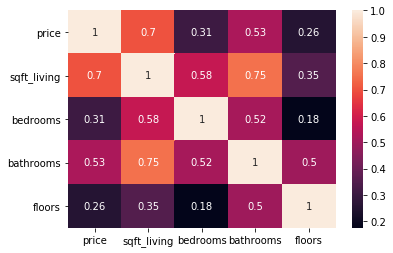

In [9]:
sns.heatmap(data.corr(),annot = True)

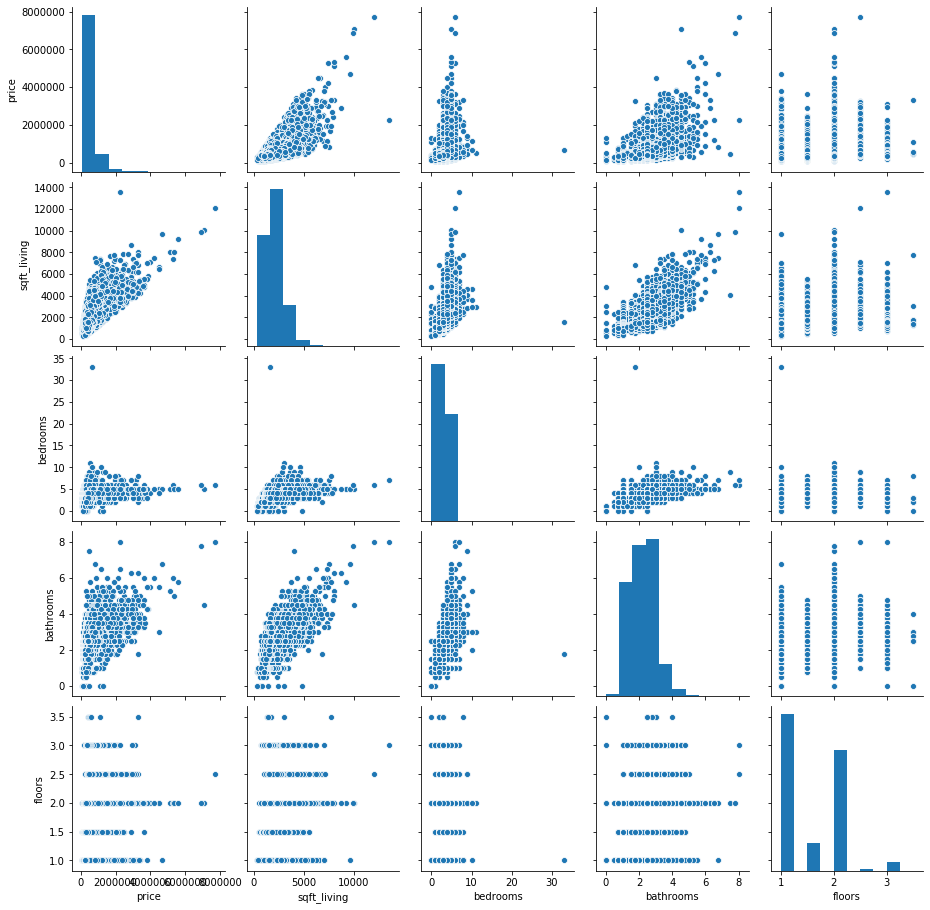

In [10]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000279F5AB01C8>,
      dtype=object)

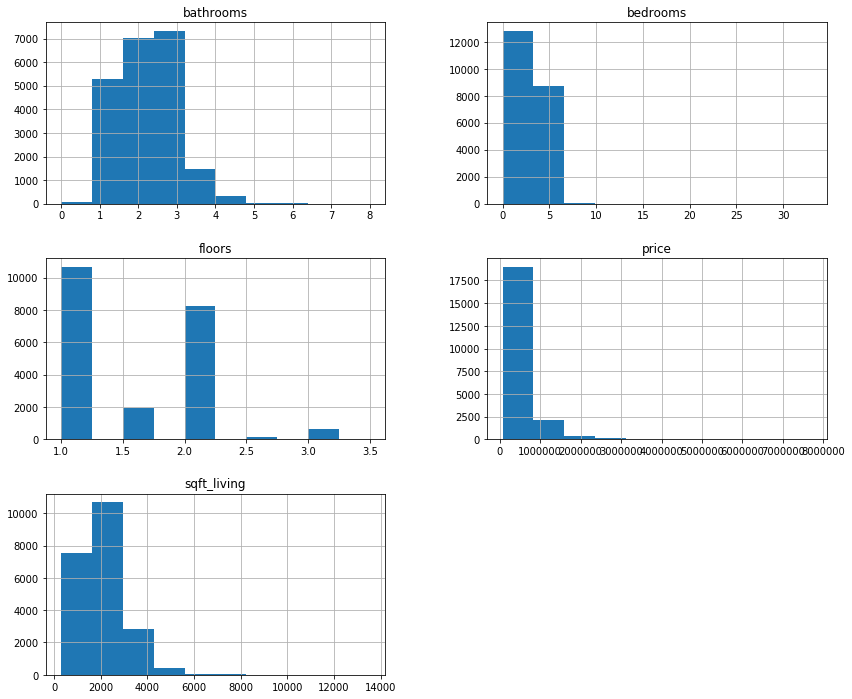

In [11]:
data.hist(figsize=(14,12))

# Price vs Sqft_living

## Assign features to x & y

In [12]:
x=data.drop(['price','bedrooms','bathrooms','floors'],axis = 1)
y=data.drop(['sqft_living','bedrooms','bathrooms','floors'],axis = 1)

Text(0, 0.5, 'Price')

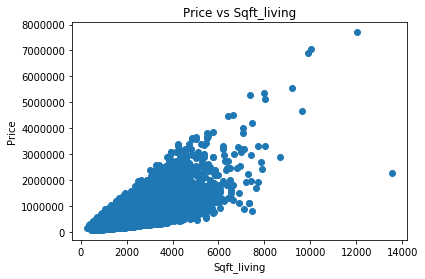

In [13]:
plt.scatter(x,y)
plt.title('Price vs Sqft_living')
plt.xlabel('Sqft_living')
plt.ylabel('Price')

## Splitting the data for training and testing

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2,test_size = 0.25)

## Model building with sklearn

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

## Training the model

In [17]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lr.coef_

array([[277.92520052]])

In [19]:
lr.intercept_

array([-37194.26253221])

## Visualising the Training result

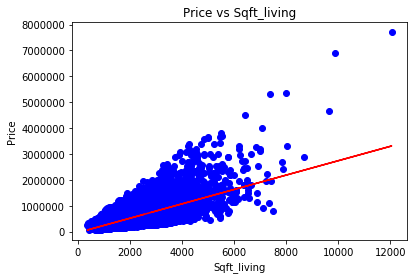

In [20]:
plt.scatter(x_train,y_train,color='blue')
plt.title('Price vs Sqft_living')
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.plot(x_train,lr.predict(x_train),color='red')

## Testing the model

In [21]:
y_pred = lr.predict(x_test)
y_pred

array([[632605.47073112],
       [565903.42260531],
       [365797.27822789],
       ...,
       [515876.88651095],
       [451954.09039039],
       [335225.50617022]])

Text(0, 0.5, 'Price')

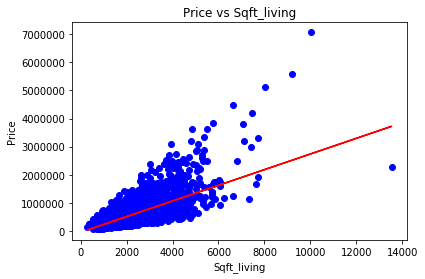

In [22]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,lr.predict(x_test),color='red')
plt.title('Price vs Sqft_living')
plt.xlabel('Sqft_living')
plt.ylabel('Price')

## Estimate the cost

In [23]:
from sklearn.metrics import mean_squared_error,r2_score

In [24]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

271710.0391961516

In [25]:
r_square = r2_score(y_test,y_pred)
r_square

0.5003052919279771

# Price vs Bedroom

## Assign features to x & y

In [26]:
x=data.drop(['price','sqft_living','bathrooms','floors'],axis = 1)
y=data.drop(['sqft_living','bedrooms','bathrooms','floors'],axis = 1)

Text(0, 0.5, 'Price')

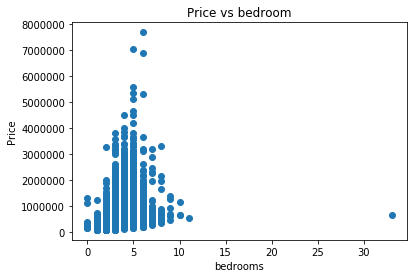

In [27]:
plt.scatter(x,y)
plt.title('Price vs bedroom')
plt.xlabel('bedrooms')
plt.ylabel('Price')

## Splitting the data for training and testing

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2,test_size = 0.25)

## Model building with sklearn

In [29]:
lr = LinearRegression()

## Training the model

In [30]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lr.coef_

array([[117235.27896102]])

In [32]:
lr.intercept_

array([144557.69610952])

## Visualising the Training result

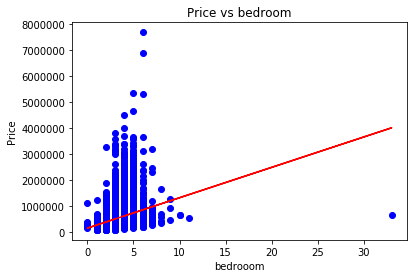

In [33]:
plt.scatter(x_train,y_train,color='blue')
plt.title('Price vs bedroom')
plt.xlabel('bedrooom')
plt.ylabel('Price')
plt.plot(x_train,lr.predict(x_train),color='red')

## Testing the model

In [34]:
y_pred = lr.predict(x_test)
y_pred

array([[613498.81195358],
       [496263.53299257],
       [379028.25403155],
       ...,
       [496263.53299257],
       [379028.25403155],
       [496263.53299257]])

Text(0, 0.5, 'Price')

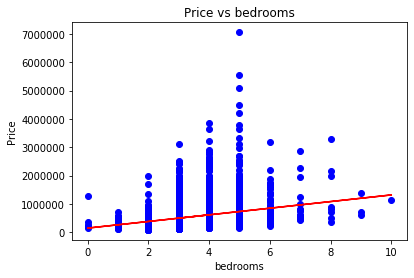

In [35]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,lr.predict(x_test),color='red')
plt.title('Price vs bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Price')

## Estimate the cost

In [36]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

363766.28914791247

In [37]:
r_square = r2_score(y_test,y_pred)
r_square

0.10435010471063455

# Price vs Bathrooms

## Assign features to x & y

In [38]:
x=data.drop(['price','bedrooms','sqft_living','floors'],axis = 1)
y=data.drop(['sqft_living','bedrooms','bathrooms','floors'],axis = 1)

Text(0, 0.5, 'Price')

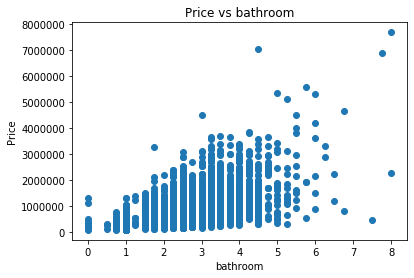

In [39]:
plt.scatter(x,y)
plt.title('Price vs bathroom')
plt.xlabel('bathroom')
plt.ylabel('Price')

## Splitting the data for training and testing

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2,test_size = 0.25)

## Model building with sklearn

In [41]:
lr = LinearRegression()

## Training the model

In [42]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
lr.coef_

array([[246285.22234616]])

In [44]:
lr.intercept_

array([18844.88023481])

## Visualising the Training result

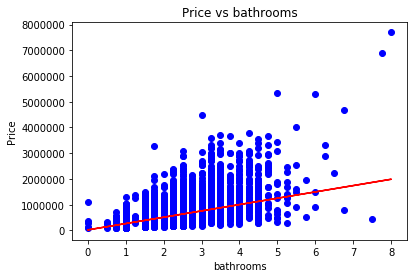

In [45]:
plt.scatter(x_train,y_train,color='blue')
plt.title('Price vs bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.plot(x_train,lr.predict(x_train),color='red')

## Testing the model

In [46]:
y_pred = lr.predict(x_test)
y_pred

array([[572986.63051368],
       [388272.71375405],
       [265130.10258097],
       ...,
       [511415.32492714],
       [449844.0193406 ],
       [511415.32492714]])

Text(0, 0.5, 'Price')

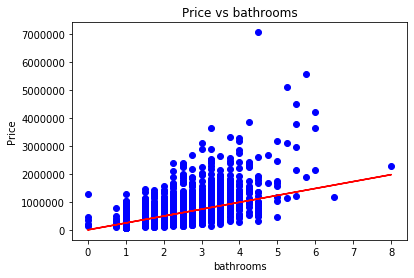

In [47]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,lr.predict(x_test),color='red')
plt.title('Price vs bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Price')

## Estimate the cost

In [48]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

326324.2238624187

In [49]:
r_square = r2_score(y_test,y_pred)
r_square

0.2792377913667644

# Price vs Floors

## Assign features to x & y

In [50]:
x=data.drop(['price','bedrooms','sqft_living','bathrooms'],axis = 1)
y=data.drop(['sqft_living','bedrooms','bathrooms','floors'],axis = 1)

Text(0, 0.5, 'Price')

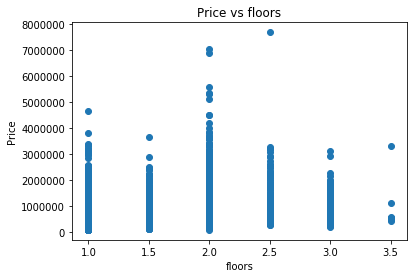

In [51]:
plt.scatter(x,y)
plt.title('Price vs floors')
plt.xlabel('floors')
plt.ylabel('Price')

## Splitting the data for training and testing

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2,test_size = 0.25)

## Model building with sklearn

In [53]:
lr = LinearRegression()

## Training the model

In [54]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
lr.coef_

array([[170674.2654533]])

In [56]:
lr.intercept_

array([283993.57314855])

## Visualising the Training result

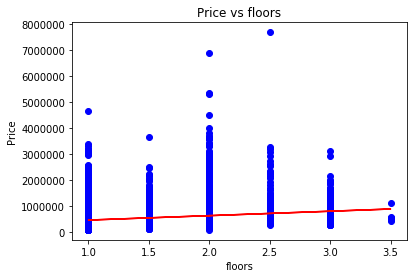

In [57]:
plt.scatter(x_train,y_train,color='blue')
plt.title('Price vs floors')
plt.xlabel('floors')
plt.ylabel('Price')
plt.plot(x_train,lr.predict(x_train),color='red')

## Testing the model

In [58]:
y_pred = lr.predict(x_test)
y_pred

array([[540004.97132849],
       [454667.83860185],
       [454667.83860185],
       ...,
       [540004.97132849],
       [454667.83860185],
       [796016.36950844]])

Text(0, 0.5, 'Price')

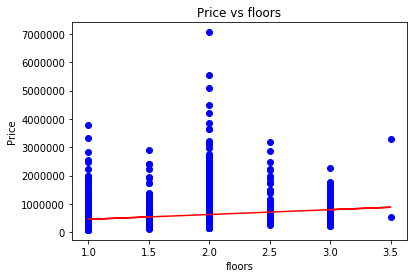

In [59]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,lr.predict(x_test),color='red')
plt.title('Price vs floors')
plt.xlabel('floors')
plt.ylabel('Price')

## Estimate the cost

In [60]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

370964.46052507753

In [61]:
r_square = r2_score(y_test,y_pred)
r_square

0.06855333989826096

# Multi-linear Regression

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [63]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


## Seperating input and output data

In [67]:
x = data.iloc[:,1:]
y = data.iloc[:,:1]

In [68]:
x.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [69]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


## Splitting the data for training and testing

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)

## Training the model

In [71]:
ml_lr = LinearRegression()

In [72]:
ml_lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Testing the model

In [73]:
y_pred = ml_lr.predict(x_test)
y_pred

array([[607674.9583261 ],
       [583856.94284837],
       [415936.27946441],
       ...,
       [533188.7734709 ],
       [516048.79857589],
       [336717.4769497 ]])

## Evaluating the model

In [74]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

267619.1189755923

In [75]:
r2_score = r2_score(y_test,y_pred)
r2_score

0.5152390217740295